In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter 
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\lazar\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_path = "ai_job_dataset.csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "bismasajjad/global-ai-job-market-and-salary-trends-2025",
  file_path,
)


C:\Users\lazar\AppData\Local\Temp\ipykernel_12316\2566293134.py:2: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [3]:
df_grouped = df.groupby(['employment_type', 'salary_currency']).size().reset_index(name="value")

In [4]:
df_sorted = df_grouped.sort_values(by=("salary_currency"), ascending=False).reset_index(drop=True)

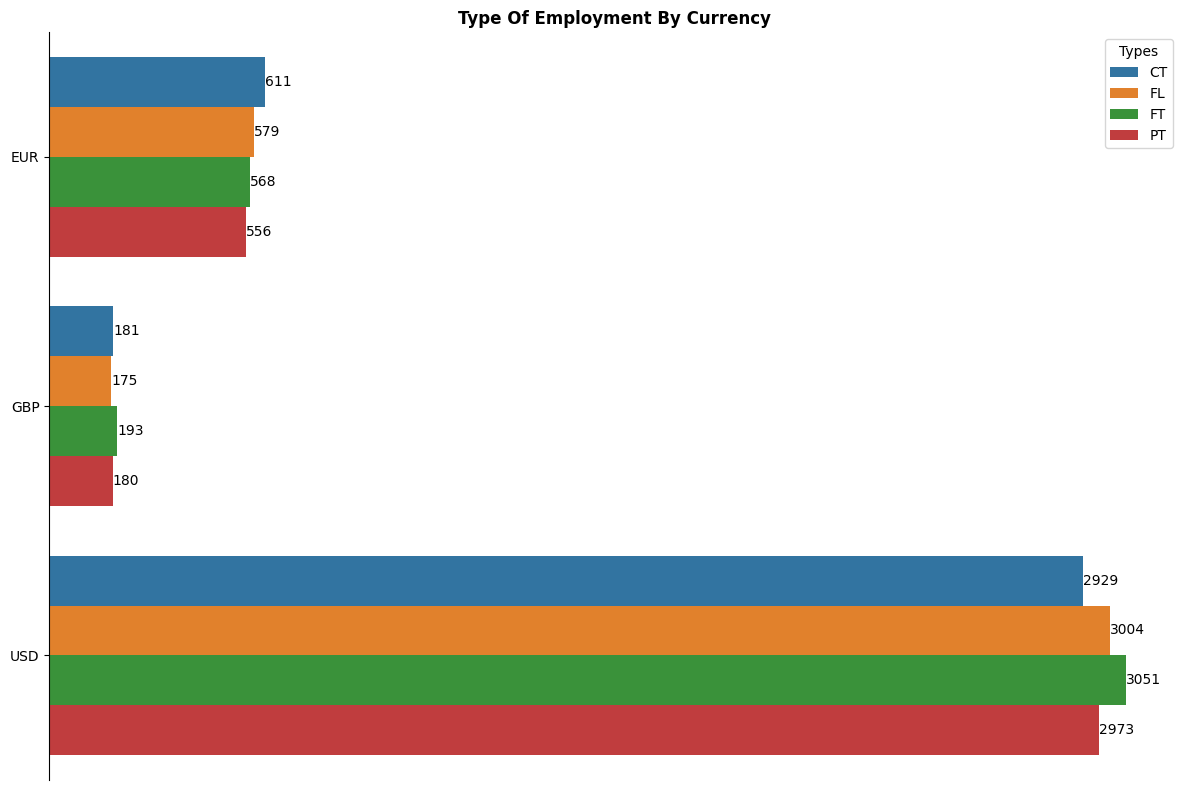

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    data=df_grouped,
    x='value',
    y='salary_currency',
    hue='employment_type',
    ax=ax,
    orient="h"
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")

ax.set_title("Type Of Employment By Currency", fontweight="bold")
ax.set_ylabel("")
ax.xaxis.set_visible(False)
sns.despine(bottom=True)
ax.legend(title="Types")

plt.tight_layout()
plt.show()